<a href="https://colab.research.google.com/github/kaitz2981-ux/TTNT/blob/main/Tuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2657085386.py:89: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


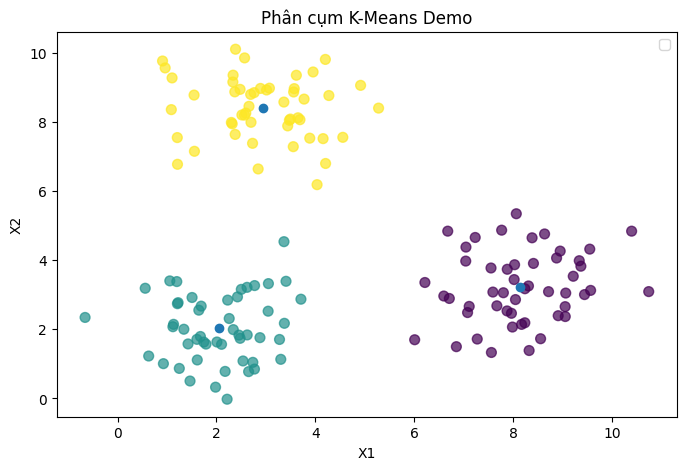

In [3]:
import numpy as np
import random
import math

class KMeans:
    """
    Cài đặt thuật toán K-Means (Phân cụm).
    """
    def __init__(self, k=3, max_iters=100, random_state=None):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.random_state = random_state

    def _euclidean_distance(self, x1, x2):
        """Tính khoảng cách Euclidean giữa hai điểm."""
        return np.sqrt(np.sum((x1 - x2)**2))

    def fit(self, X):
        """Khởi tạo và chạy thuật toán K-Means."""
        if self.random_state is not None:
            np.random.seed(self.random_state)

        n_samples = X.shape[0]

        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):

            cluster_assignments = self._create_clusters(X)

            old_centroids = self.centroids
            self.centroids = self._update_centroids(X, cluster_assignments)

            if self._is_converged(old_centroids, self.centroids):
                break

        return self.centroids

    def _create_clusters(self, X):
        """Gán mỗi điểm dữ liệu vào centroid gần nhất."""
        cluster_assignments = []
        for sample in X:
            distances = [self._euclidean_distance(sample, centroid) for centroid in self.centroids]
            closest_centroid_index = np.argmin(distances)
            cluster_assignments.append(closest_centroid_index)
        return np.array(cluster_assignments)

    def _update_centroids(self, X, cluster_assignments):
        """Tính toán vị trí mới của các centroids (tâm cụm)."""
        new_centroids = np.zeros((self.k, X.shape[1]))
        for idx in range(self.k):
            points_in_cluster = X[cluster_assignments == idx]
            if len(points_in_cluster) > 0:
                new_centroids[idx] = np.mean(points_in_cluster, axis=0)
            else:
                new_centroids[idx] = self.centroids[idx]
        return new_centroids

    def _is_converged(self, old_centroids, new_centroids):
        """Kiểm tra xem các centroids có ngừng di chuyển không."""
        distances = [self._euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def predict(self, X):
        """Dự đoán cluster cho các điểm mới hoặc điểm huấn luyện."""
        return self._create_clusters(X)
if __name__ == '__main__':
    X = np.concatenate([
        np.random.normal(loc=[2, 2], scale=1, size=(50, 2)),
        np.random.normal(loc=[8, 3], scale=1, size=(50, 2)),
        np.random.normal(loc=[3, 8], scale=1, size=(50, 2))
    ])

    kmeans = KMeans(k=3, random_state=42)
    kmeans.fit(X)

    clusters = kmeans.predict(X)

    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(8, 5))
        plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
        plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1])
        plt.title("Phân cụm K-Means Demo")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.legend()
        plt.show()
    except ImportError:
        print("\nCần thư viện Matplotlib để trực quan hóa.")
        print("Centroids cuối cùng:\n", kmeans.centroids)

In [5]:
import numpy as np
from collections import Counter

class KNN:
    """
    Cài đặt thuật toán K-Nearest Neighbors (k-NN).
    Hỗ trợ hai phương pháp trọng số: 'uniform' và 'distance'.
    """
    def __init__(self, k=5, weight_method='uniform'):
        self.k = k
        self.weight_method = weight_method
        self.X_train = None
        self.y_train = None

    def _euclidean_distance(self, x1, x2):
        """Tính khoảng cách Euclidean giữa hai điểm."""
        return np.sqrt(np.sum((x1 - x2)**2))

    def fit(self, X, y):
        """Lưu trữ tập dữ liệu huấn luyện."""
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """Dự đoán nhãn cho một tập hợp các điểm."""
        y_pred = [self._predict_single_sample(x) for x in X]
        return np.array(y_pred)

    def _predict_single_sample(self, x):
        """Dự đoán nhãn cho một điểm dữ liệu duy nhất."""

        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        k_nearest_distances = [distances[i] for i in k_indices]

        if self.weight_method == 'uniform':
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]

        elif self.weight_method == 'distance':
            class_votes = {}
            for label in np.unique(self.y_train):
                class_votes[label] = 0.0
            for label, dist in zip(k_nearest_labels, k_nearest_distances):
                if dist < 1e-6:
                    weight = 1.0
                else:
                    weight = 1.0 / (dist**2)

                class_votes[label] += weight

            predicted_label = max(class_votes, key=class_votes.get)
            return predicted_label

        else:
            raise ValueError("Phương pháp trọng số không hợp lệ. Chỉ chấp nhận 'uniform' hoặc 'distance'.")
if __name__ == '__main__':
    X_train = np.array([
        [1.0, 1.0], [1.5, 1.8], [5.0, 8.0], [8.0, 8.0], [1.0, 0.6],
        [9.0, 11.0], [0.8, 1.2], [10.0, 10.0]
    ])
    y_train = np.array([0, 0, 1, 1, 0, 1, 0, 1])

    X_test = np.array([
        [2.0, 2.0]
    ])

    print("Dữ liệu huấn luyện:\n", X_train)
    print("Nhãn huấn luyện:\n", y_train)
    print("Điểm cần dự đoán (X_test):", X_test[0])

    print("\n--- K-NN (k=3) ---")

    knn_uniform = KNN(k=3, weight_method='uniform')
    knn_uniform.fit(X_train, y_train)
    pred_uniform = knn_uniform.predict(X_test)
    print(f"1. Uniform Weighting: Dự đoán = {pred_uniform[0]}")

    knn_distance = KNN(k=3, weight_method='distance')
    knn_distance.fit(X_train, y_train)
    pred_distance = knn_distance.predict(X_test)
    print(f"2. Distance Weighting: Dự đoán = {pred_distance[0]}")

Dữ liệu huấn luyện:
 [[ 1.   1. ]
 [ 1.5  1.8]
 [ 5.   8. ]
 [ 8.   8. ]
 [ 1.   0.6]
 [ 9.  11. ]
 [ 0.8  1.2]
 [10.  10. ]]
Nhãn huấn luyện:
 [0 0 1 1 0 1 0 1]
Điểm cần dự đoán (X_test): [2. 2.]

--- K-NN (k=3) ---
1. Uniform Weighting: Dự đoán = 0
2. Distance Weighting: Dự đoán = 0
